In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
def f1(xy):
    x, y = xy
    return (x - 2)**2 + (y - 2)**2 - 0.8 * np.cos(3 * x) + 0.7 * np.cos(5 * y)

In [4]:
def f2(xy):
    x, y = xy
    return (x + 1)**2 + (y + 1)**2 - 0.5 * np.sin(3 * x) + 0.6 * np.sin(5 * y)

In [5]:
def naive_grid_method(grid_points=50):
    x_vals = np.linspace(-3, 3, grid_points)
    y_vals = np.linspace(-3, 3, grid_points)
    grid = np.array(np.meshgrid(x_vals, y_vals)).T.reshape(-1, 2)
    pareto_points = []

    for point in grid:
        dominated = False
        f1_point, f2_point = f1(point), f2(point)
        for other_point in grid:
            f1_other, f2_other = f1(other_point), f2(other_point)
            if f1_other <= f1_point and f2_other <= f2_point and (f1_other < f1_point or f2_other < f2_point):
                dominated = True
                break
        if not dominated:
            pareto_points.append((f1_point, f2_point))
    
    return np.array(pareto_points)

In [6]:
def weighted_sum_method(lambdas, initial_guess=[0, 0]):
    pareto_points = []

    for lambd in lambdas:
        def weighted_obj(xy):
            return (1 - lambd) * f1(xy) + lambd * f2(xy)
        
        res = minimize(weighted_obj, initial_guess, method='Nelder-Mead')
        pareto_points.append([f1(res.x), f2(res.x)])
    
    return np.array(pareto_points)

In [7]:
grid_pareto = naive_grid_method()
weighted_pareto = weighted_sum_method(np.linspace(0, 1, 50))

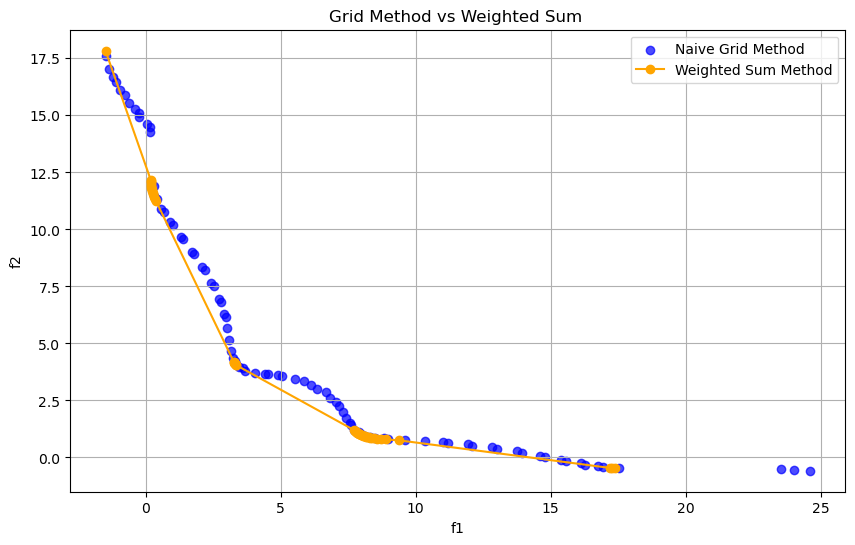

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(grid_pareto[:, 0], grid_pareto[:, 1], label='Naive Grid Method', alpha=0.7, color='blue')
plt.plot(weighted_pareto[:, 0], weighted_pareto[:, 1], 'o-', label='Weighted Sum Method', color='orange')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Grid Method vs Weighted Sum ')
plt.legend()
plt.grid(True)
plt.show()